# Imports

In [1]:
import sdf_helper as sh
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi, sin
import os
from matplotlib import colors
import sdf

plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"] = (10, 8)
import imageio as imageio
import glob
import pandas as pd
import seaborn as sns
import tqdm

# Informations

In [2]:
lambd = 1e-6
# Er = getEr(lambd)
omega0 = 2 * np.pi * 299792458 / 1e-6
tau = 2*pi/omega0
nc = omega0*omega0/(4*pi*pi*81)
# dt = (20*tau/31570)
omega0, nc

(1883651567308853.2, 1.109574294736812e+27)

In [4]:
DIR = "D_1.0_A_0.5"
NX = 1000
NODE1 = 300
NODE2 = 600
ALL_FILES = glob.glob(os.path.join(DIR, "*.sdf"))
ALL_FILES.sort()

X = np.linspace(-10, 10, NX)
T = np.linspace(0, 20*tau, len(ALL_FILES))*1e15

# Saving Images for Density

In [5]:
all_dirs = glob.glob("D_*")
# all_dirs
len(all_dirs)

150

In [14]:
def save_density(directory):
    all_files = glob.glob(os.path.join(directory, "*.sdf"))
    all_files.sort()
    # print(len(all_files))
    D = []
    
    for i, file in enumerate(all_files):
        data = sdf.read(file)
        D.append(data.Derived_Number_Density_Electron.data)
    # print(len(D))
    plt.imshow(np.array(D)/nc, aspect="auto", cmap="gray")
    cmap = colors.ListedColormap("gray")
    plt.colorbar(cmap=cmap)
    file_name=f"{directory}.jpg"
    file_dir = os.path.join("Images", file_name)
    # print(file_dir)
    plt.title(file_name.replace(".jpg", ""))
    plt.savefig(file_dir)
    plt.close()

In [ ]:
for d in tqdm.tqdm(all_dirs, desc="Saving images"):
    save_density(d)

# The Plasma Position

In [13]:
data = sdf.read(ALL_FILES[0])

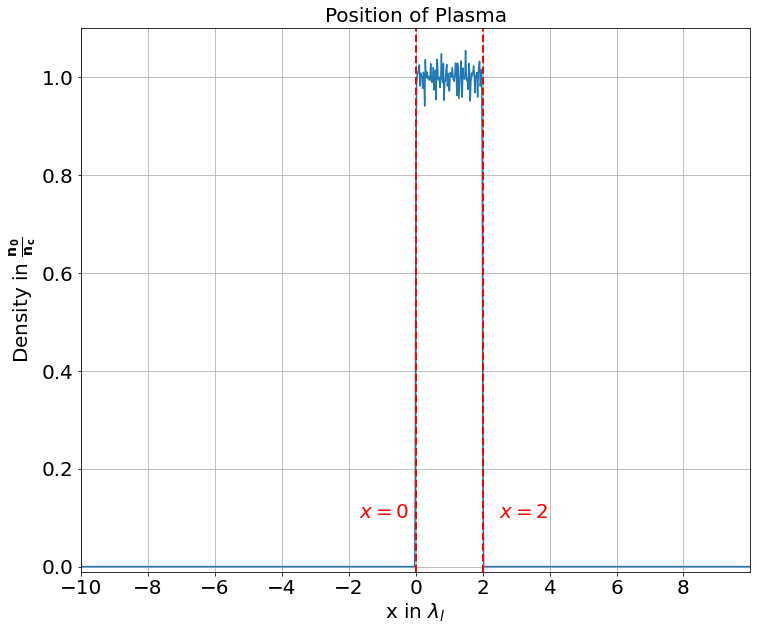

In [33]:
plt.figure(figsize=(12, 10))
plt.plot(X, data.Derived_Number_Density_Electron.data/nc)
plt.axvline(0, linestyle = "--", color="red", linewidth=2)
plt.annotate("$x=0$", (-1.7, 0.1), color="red", fontsize=20)
plt.axvline(2, linestyle = "--", color="red", linewidth=2)
plt.annotate("$x=2$", (2.5, 0.1), color="red", fontsize=20)
plt.xlim(-10, 10)
plt.ylim(-0.01, 1.1)
plt.title("Position of Plasma", fontsize=20)
plt.xlabel("x in $\lambda_l$", fontsize=20)
plt.ylabel(r"Density in $\mathbf{\frac{n_0}{n_c}}$", fontsize=20)
plt.grid("both")
plt.xticks(np.arange(-10, 10, 2),fontsize=20)
plt.yticks(fontsize=20)
plt.savefig("/media/hari31416/Hari_SSD/Users/harik/Desktop/Project_Sem_3/Presentations/PPTs/Sem_3_Minor/plasma.png", dpi=400)

# The Field at Different Times

In [17]:
def get_field(id, component="y"):
    raw_data = sdf.read(ALL_FILES[id])
    comp = {
        "x": raw_data.Electric_Field_Ex,
        "y": raw_data.Electric_Field_Ey,
        "z": raw_data.Electric_Field_Ez,
    }
    field = comp[component].data
    return field

In [18]:
def plot_field(id, ax, component = "y"):
    raw_data = sdf.read(ALL_FILES[id])
    comp = {
        "x": raw_data.Electric_Field_Ex,
        "y": raw_data.Electric_Field_Ey,
        "z": raw_data.Electric_Field_Ez,
    }
    field = comp[component].data
    t = id*0.5
    X = np.linspace(-10, 10, 1000)
    raw_data = sdf.read(ALL_FILES[id])
    ax.axvline(0, linestyle = "--", color="red", linewidth=2)
    ax.axvline(2, linestyle = "--", color="red", linewidth=2)
    ax.plot(X, field)
    ax.set_xlabel("x in $\lambda_l$", fontsize=17)
    ax.set_ylabel(r"$E_y$ in $\frac{V}{m}$", fontsize=17)
    # ax.set_xticks(np.arange(-10, 10, 2),fontsize=17)
    # ax.set_yticks(fontsize=17)
    ax.set_title(f"$E_{component}$ at $t={t:.1f}$ fs")

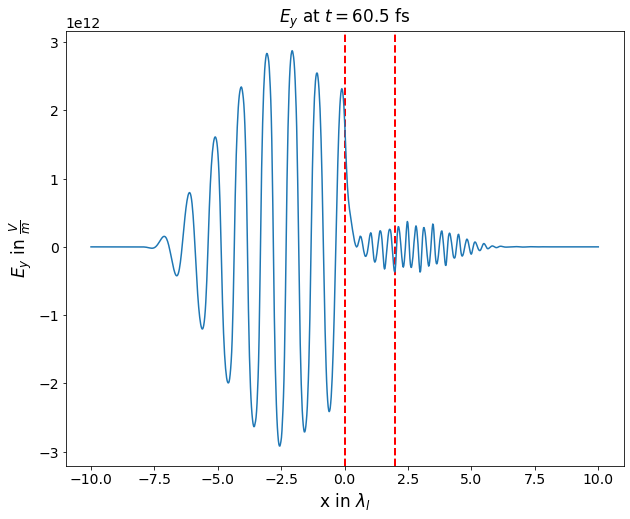

In [19]:
plot_field(121, plt.gca())

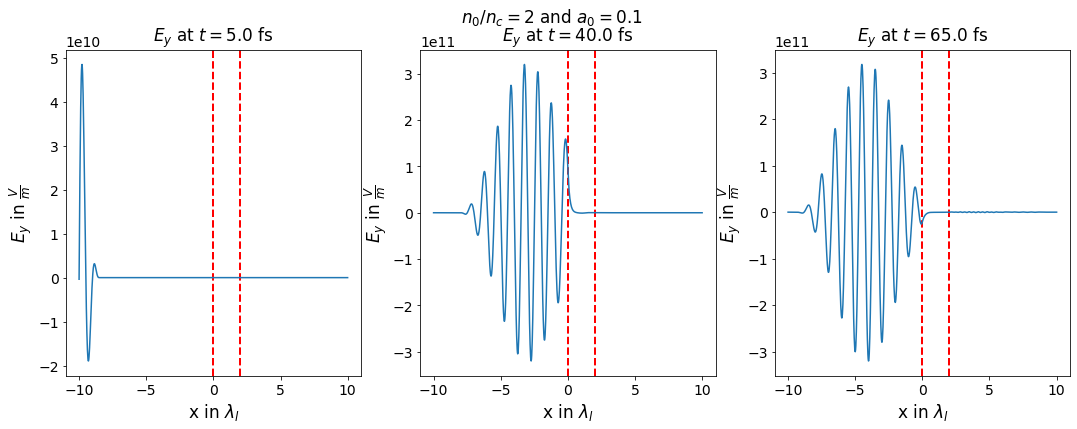

In [38]:
DIR = "D_2_A_0.1"
r = DIR.split("_")[1]
a0 = DIR.split("_")[-1]
title = f"$n_0/n_c = {r}$ and $a_0={a0}$"
ALL_FILES = glob.glob(os.path.join(DIR, "*.sdf"))
ALL_FILES.sort()
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle(title)
times = [10, 80, 130]
for i, t in enumerate(times):
    plot_field(t, axes[i])
plt.savefig("/media/hari31416/Hari_SSD/Users/harik/Desktop/Project_Sem_3/Presentations/PPTs/Sem_3_Minor/p1.png", dpi=400)

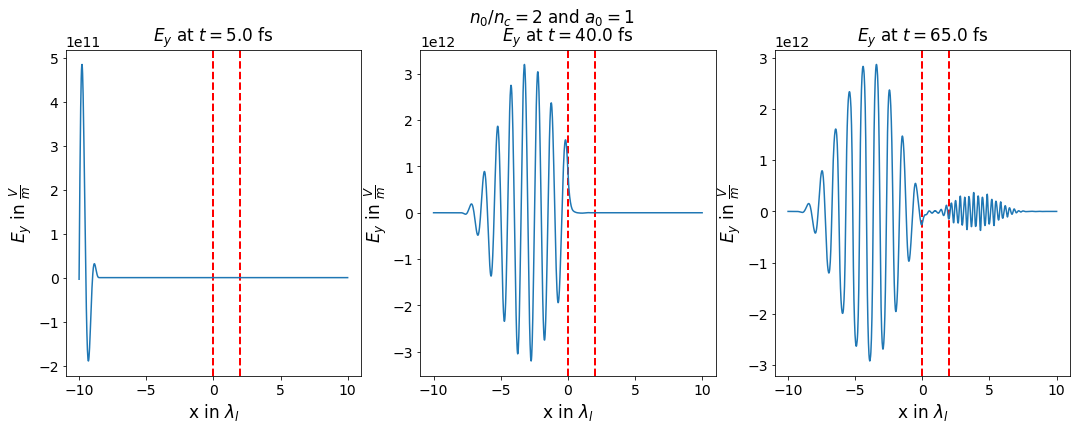

In [35]:
DIR = "D_2_A_1"
r = DIR.split("_")[1]
a0 = DIR.split("_")[-1]
title = f"$n_0/n_c = {r}$ and $a_0={a0}$"
ALL_FILES = glob.glob(os.path.join(DIR, "*.sdf"))
ALL_FILES.sort()
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle(title)
times = [10, 80, 130]
for i, t in enumerate(times):
    plot_field(t, axes[i])

plt.savefig("/media/hari31416/Hari_SSD/Users/harik/Desktop/Project_Sem_3/Presentations/PPTs/Sem_3_Minor/p2.png", dpi=400)

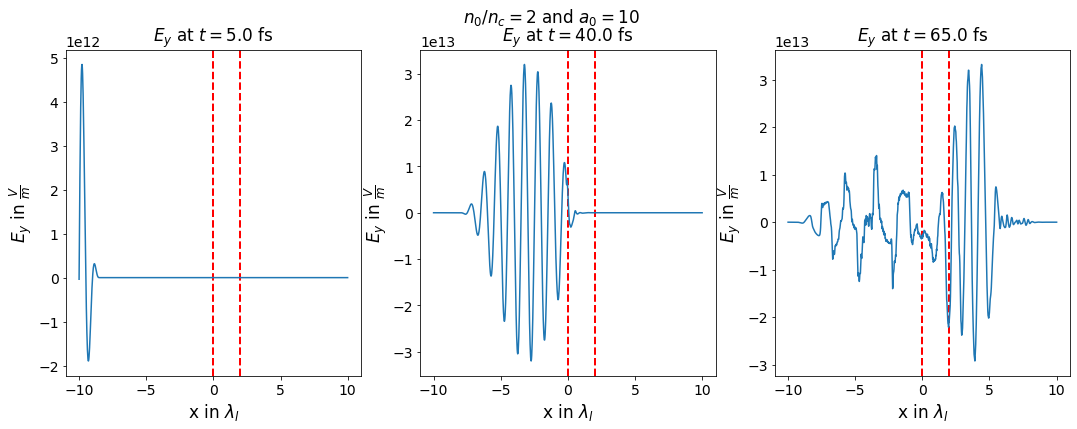

In [36]:
DIR = "D_2_A_10"
r = DIR.split("_")[1]
a0 = DIR.split("_")[-1]
title = f"$n_0/n_c = {r}$ and $a_0={a0}$"
ALL_FILES = glob.glob(os.path.join(DIR, "*.sdf"))
ALL_FILES.sort()
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle(title)
times = [10, 80, 130]
for i, t in enumerate(times):
    plot_field(t, axes[i])

plt.savefig("/media/hari31416/Hari_SSD/Users/harik/Desktop/Project_Sem_3/Presentations/PPTs/Sem_3_Minor/p3.png", dpi=400)

# Reflectance

In [39]:
def find_reflectance(directory):
    all_files = glob.glob(os.path.join(directory, "*.sdf"))
    all_files.sort()
    Ey1 = []
    Ey2 = []
    
    for file in all_files:
        data = sdf.read(file)
        Ey1.append(data.Electric_Field_Ey.data[NODE1])
        Ey2.append(data.Electric_Field_Ey.data[NODE2])
    
    R = (np.sum(np.array(Ey1)**2)-np.sum(np.array(Ey2)**2))/np.sum(np.array(Ey1)**2)
    D = directory.split("_")[1]
    A = directory.split("_")[-1]
    return R, float(D), float(A)

In [40]:
Rs = []
Ds = []
As = []
for d in tqdm.tqdm(all_dirs, desc="Finding reflectance"):
    R, D, A = find_reflectance(d)
    Rs.append(R)
    Ds.append(D)
    As.append(A)

Finding reflectance: 100%|██████████| 150/150 [00:36<00:00,  4.10it/s]


In [41]:
result = pd.DataFrame({"D": Ds, "A": As, "R": Rs})

In [42]:
result.sort_values(by=["D", "A"], inplace=True)
result

,D,A,R
114,0.1,0.1,0.016247
115,0.1,0.5,0.014190
116,0.1,1.0,0.018076
118,0.1,2.0,0.015606
119,0.1,5.0,0.015462
...,...,...,...
34,10.0,0.5,0.999992
35,10.0,1.0,0.999765
37,10.0,2.0,0.998842
38,10.0,5.0,0.992664


In [43]:
result.to_csv("result.csv", index=False)

In [49]:
result = pd.read_csv("result.csv")

In [44]:
result["A"].value_counts()

0.1     25
0.5     25
1.0     25
2.0     25
5.0     25
10.0    25
Name: A, dtype: int64

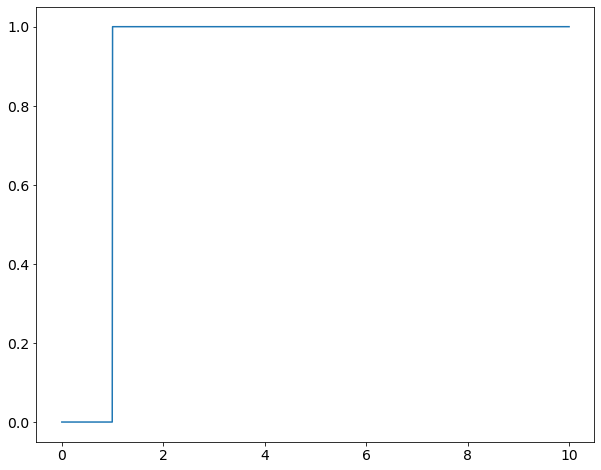

In [45]:
X = np.linspace(0,10, 1500)
def step(x):
    return 1*(x>1)
Y = step(X)
plt.plot(X, Y)

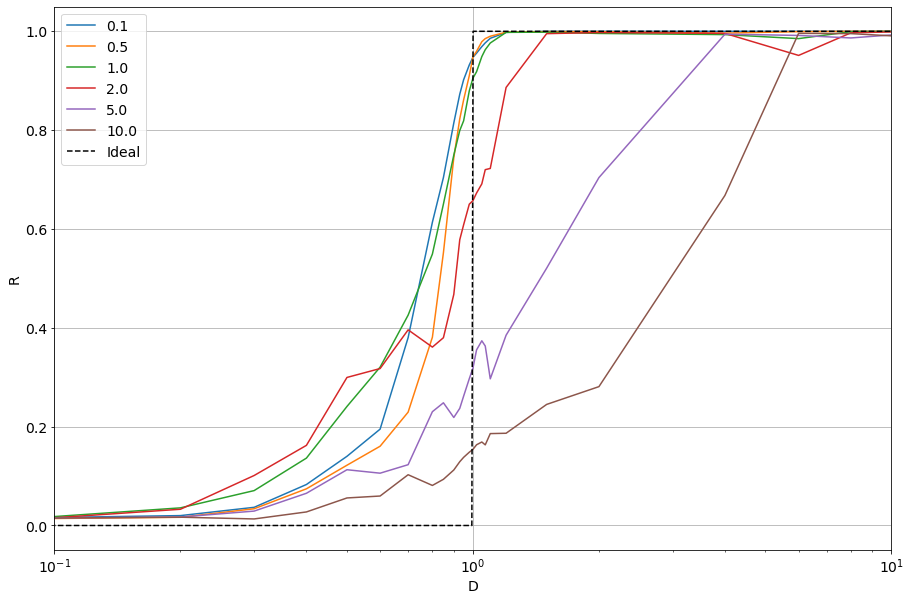

In [46]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=result, x="D", y="R", hue="A", palette="tab10")
plt.plot(X, Y, color="black", linestyle="--", label="Ideal")
plt.xscale("log")
# plt.yscale("log")
plt.xlim(0.1, 10)
plt.grid()
plt.legend();

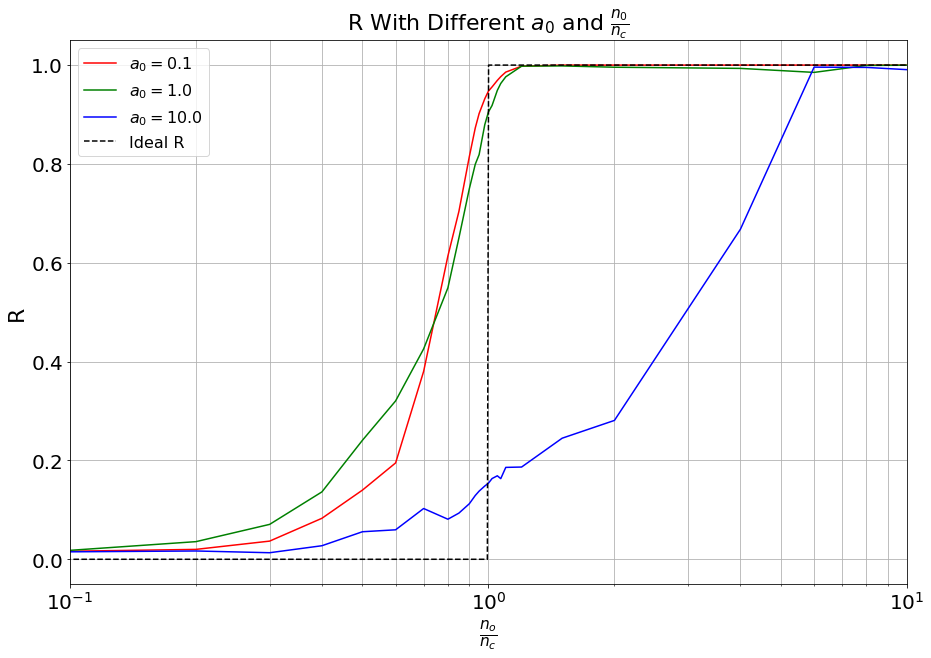

In [51]:
colors_ = ["r", "g", "b", "y", "c", "m", "k", "w"]
plt.figure(figsize=(15, 10))
for i, A in enumerate([0.1, 1.0, 10.0]):
    plt.plot(result[result["A"]==A]["D"], result[result["A"]==A]["R"], label=f"$a_0={A}$", color=colors_[i])
plt.plot(X, Y, color="black", linestyle="--", label="Ideal R")
plt.xscale("log")
plt.xlim(0.1, 10)
plt.grid(which='both')
plt.legend(fontsize=16);
plt.title(r"R With Different $a_0$ and $\frac{n_0}{n_c}$", fontsize=22)
plt.xlabel(r"$\frac{n_o}{n_c}$", fontsize=22)
plt.ylabel("R", fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig("/media/hari31416/Hari_SSD/Users/harik/Desktop/Project_Sem_3/Presentations/PPTs/Sem_3_Minor/reflection.png", dpi=400)

# The Density Figure

In [33]:
extent = [-5, 5, 0, 20]
def plot_density(ax, directory):
    all_files = glob.glob(os.path.join(directory, "*.sdf"))
    all_files.sort()
    D = []
    
    for i, file in enumerate(all_files):
        data = sdf.read(file)
        D.append(data.Derived_Number_Density_Electron.data)
    
    ax.imshow(np.array(D)[:, :]/nc, aspect="auto", cmap="jet", extent=extent)
    # print(np.array(D).shape)
    # ax.set_xticks([])

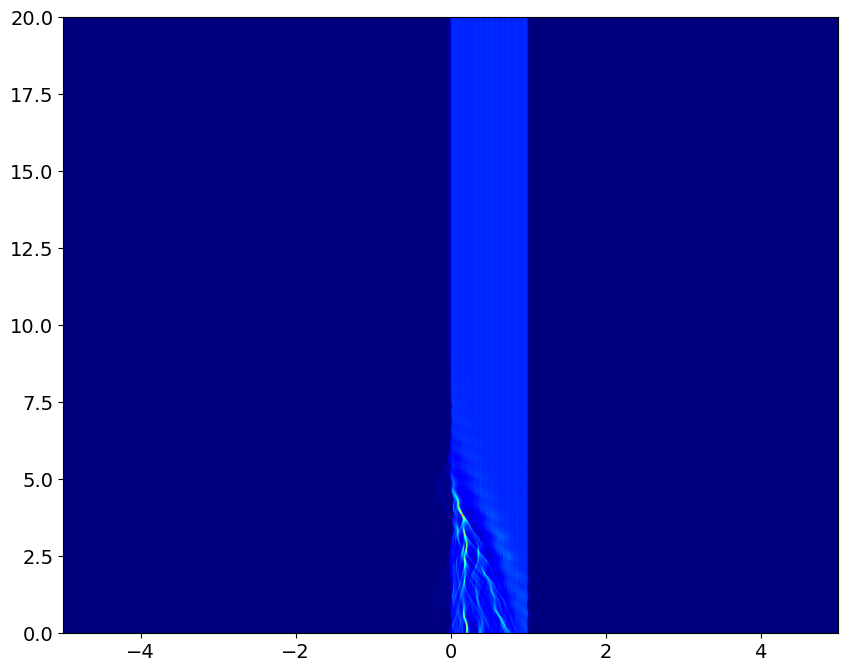

In [34]:
plot_density(plt.gca(), "D_1.0_A_1")

In [35]:
def plot_density(ax, directory):
    all_files = glob.glob(os.path.join(directory, "*.sdf"))
    all_files.sort()
    D = []
    
    for i, file in enumerate(all_files):
        data = sdf.read(file)
        D.append(data.Derived_Number_Density_Electron.data)
    den = directory.split("_")[1]
    a0 = directory.split("_")[-1]
    ax.imshow(np.array(D)/nc, aspect="auto", cmap="plasma", extent=extent, origin="lower")
    ax.set_xlabel(r"$x$ in $\lambda_l$", fontsize=20)
    ax.set_ylabel(r"$t$ in $\tau$", fontsize=20)
    ax.set_title(f"$a_0 = {a0}$", fontsize=20)
    ax.set_xlim(-0.5, 1.2)
    ax.set_ylim(12, 20)
    # ax.set_xticks(ticks= ax.get_xticks(), fontsize=20)
    # ax.set_yticks(ticks=ax.get_yticks(), fontsize=20)

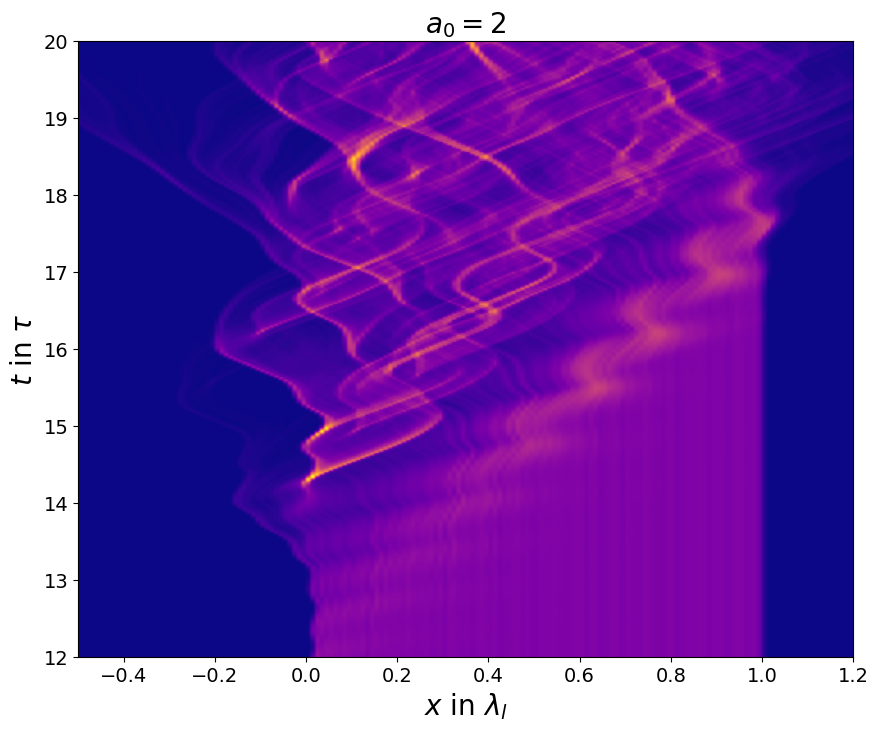

In [36]:
plot_density(plt.gca(), "D_1.0_A_2")

In [38]:
def plot_density(ax, directory):
    all_files = glob.glob(os.path.join(directory, "*.sdf"))
    all_files.sort()
    D = []
    
    for i, file in enumerate(all_files):
        data = sdf.read(file)
        D.append(data.Derived_Number_Density_Electron.data)
    den = directory.split("_")[1]
    a0 = directory.split("_")[-1]
    ax.imshow(np.array(D)[10*80:10*135, 450:620]/nc, aspect="auto", cmap="plasma", extent=[-0.5, 1.2, 20, 11.85])
    ax.set_xlabel(r"$x$ in $\lambda_l$", fontsize=20)
    ax.set_ylabel(r"$t$ in $\tau$", fontsize=20)
    ax.set_title(f"$a_0 = {a0}$", fontsize=20)
    ax.set_xlim(-0.5, 1.2)
    # ax.set_xticks(ticks= ax.get_xticks(), fontsize=20)
    # ax.set_yticks(ticks=ax.get_yticks(), fontsize=20)

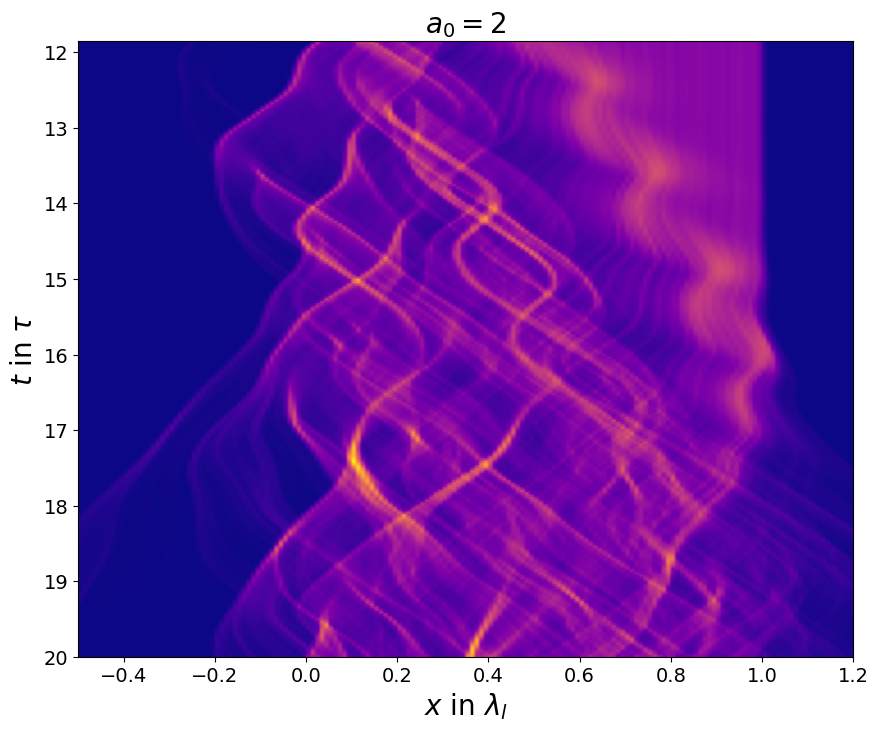

In [39]:
plot_density(plt.gca(), "D_1.0_A_2")

/tmp/ipykernel_10930/1090818267.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


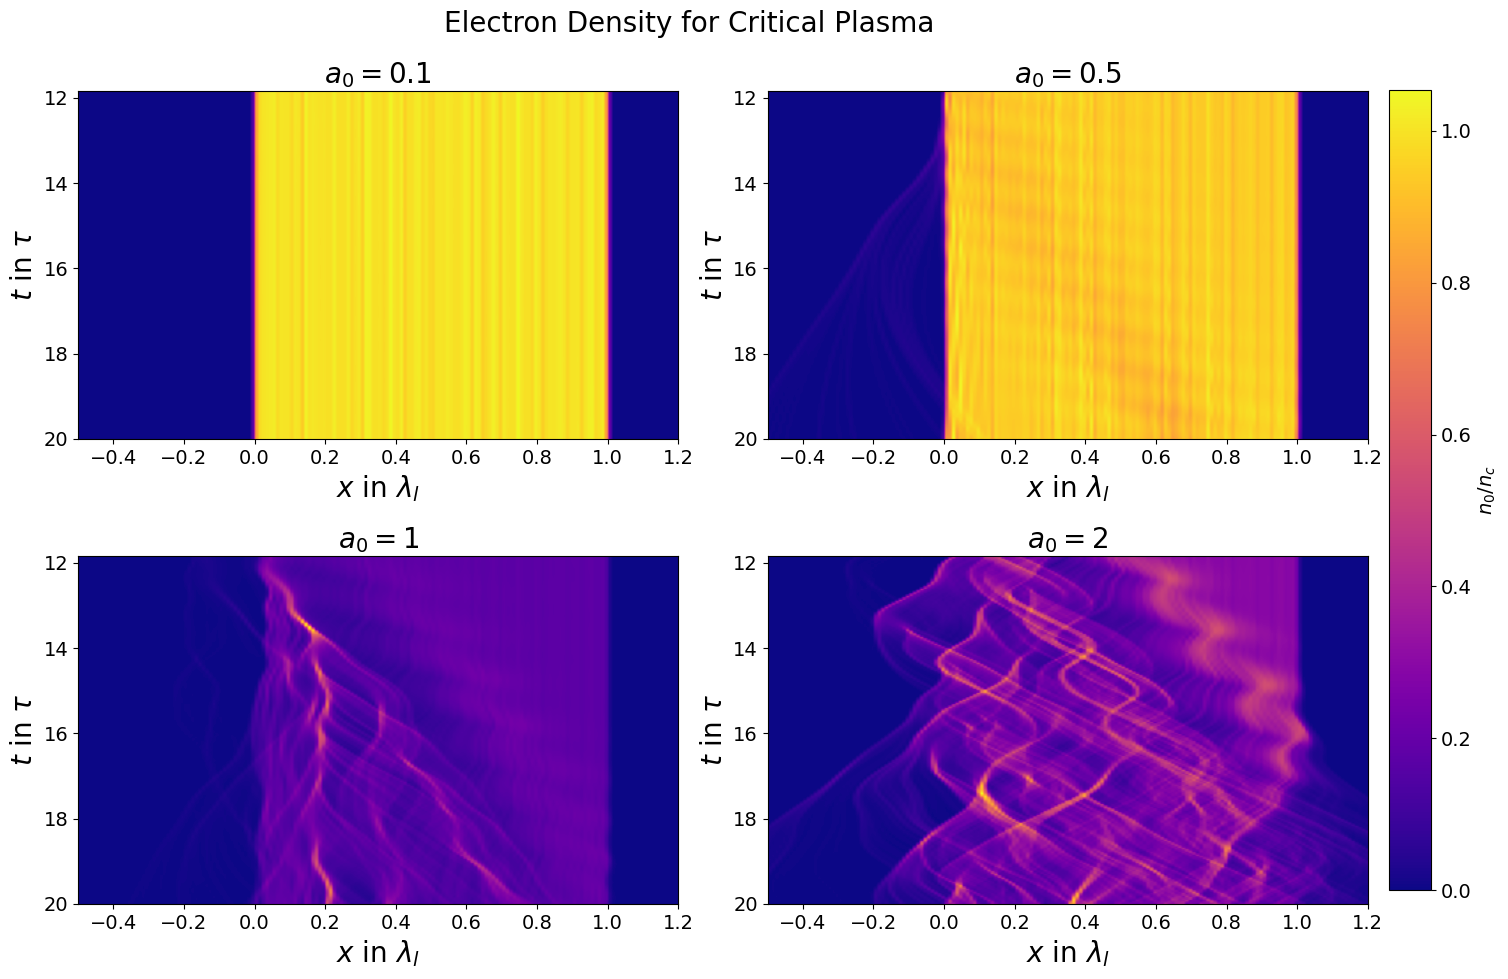

In [43]:
dirs = ['D_1.0_A_0.1', 'D_1.0_A_0.5','D_1.0_A_1', 'D_1.0_A_2',]
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
cax = fig.add_axes([1.0, 0.1, 0.03, 0.8])
fig.suptitle("Electron Density for Critical Plasma", fontsize=20)
for i, d in enumerate(dirs):
    plot_density(axes[i//2, i%2], d)
fig.colorbar(axes[0, 0].images[0], cax=cax, label=r"$n_0/n_c$", orientation="vertical")
plt.tight_layout()
# fig.savefig("/media/hari31416/Hari_SSD/Users/harik/Desktop/MSc_Project/Presentations/Reports/Sem_4_Major/images/density_oscillations.png", dpi=200)